In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


# Exploratory Data Analysis (EDA). Part 1

## Pandas
### Download data
* .csv (Comma Separated Files) [pandas.read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
* .xls (eXceL Spreadsheet) [pandas.read_excel()](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)
* .json (JavaScript Object Notation) [pandas.read_json()](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html)
* .txt

Save .csv file from https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv

In [2]:
!wget https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv

--2024-09-06 00:25:13--  https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61205 (60K) [text/plain]
Saving to: ‘data_sem1.csv’

data_sem1.csv       100%[===================>]  59.77K  --.-KB/s    in 0.007s  

2024-09-06 00:25:13 (8.18 MB/s) - ‘data_sem1.csv’ saved [61205/61205]



In [3]:
!ls

data_sem1.csv  sample_data


In [4]:
Data = pd.read_csv("data_sem1.csv", sep=";")
#Data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv", sep=";")

In [5]:
Data.head() #tail(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


## Working with DataFrame object:
Column names

In [6]:
Data.columns #.values

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
for i in Data.columns:
    print(i)

In [ ]:
#d = dict(zip(df.columns.values[[0,1,2,4,5]], [np.int32, np.float32, np.float32, np.float32, np.int32]))
#df2 = pd.read_csv(PATH, dtype=d)
#df2.info()

Rows names

In [8]:
Data.index

RangeIndex(start=0, stop=891, step=1)

Access by index

In [ ]:
Data.iloc[Data.index % 2 == 0].head(5)
#Data.iloc[1,2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,McCarthy; Mr. Timothy J,male,54.0,0,0,17463,51.8625,E46,S
8,9,1,3,Johnson; Mrs. Oscar W (Elisabeth Vilhelmina Berg),female,27.0,0,2,347742,11.1333,NaN,S


Access by names

In [9]:
Data.loc[0,'Name']

'Braund; Mr. Owen Harris'

In [10]:
Data_indexed = Data.set_index('Name')

In [12]:
Data_indexed.head()

In [ ]:
Data_indexed.loc['Braund; Mr. Owen Harris']

**1.** Look at the shape of data

In [ ]:
Data.shape

(891, 12)

**2.** Information about numerical features

In [ ]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**3.** Information about all features

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**4.** Get information about columns

Survived

In [ ]:
Data.Survived.value_counts(dropna=False)  #Data.Survived  is the same as Data['Survived']

0    549
1    342
Name: Survived, dtype: int64

Pclass

In [ ]:
Data['Pclass'].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

Sex

In [ ]:
Data['Sex'].value_counts(dropna=False)

male       574
female     312
unknown      5
Name: Sex, dtype: int64

In [36]:
#Data.Sex.value_counts().plot.bar() #normalize=True

<Axes: xlabel='Sex', ylabel='proportion'>

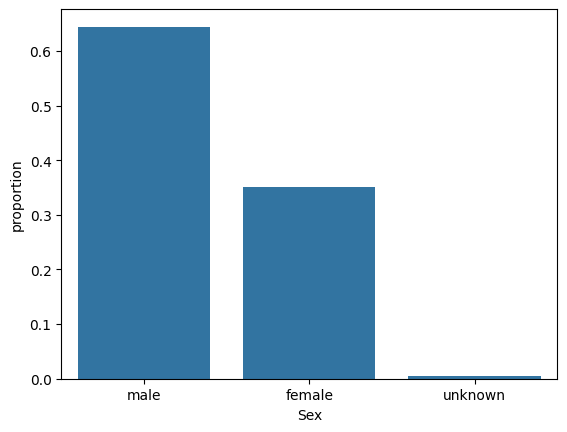

In [46]:
sns.barplot(Data['Sex'].value_counts(dropna=False, normalize=True))
# sns.catplot(data=Data, x='Sex', kind='count')

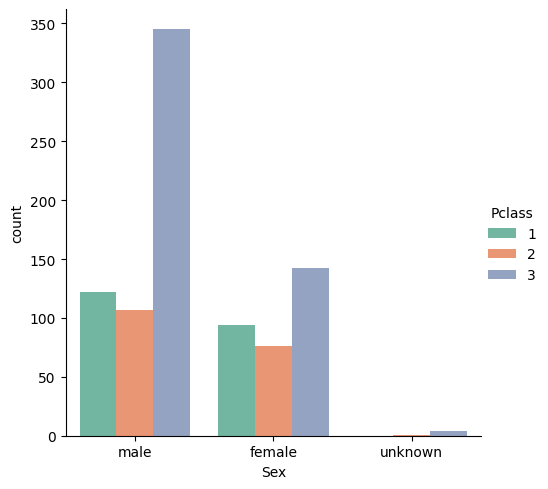

In [28]:
sns.catplot(
    data=Data,
    x='Sex',
    hue='Pclass',
    kind='count',
    palette='Set2'
)

How to handle 'Sex'?

In [14]:
Data[Data.Sex == 'unknown']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Assign manually

In [ ]:
Data.loc[[5, 13], 'Sex'] = 'male'
#Data.iloc[[5, 13], 4]


**5.** Is the sex an important feature?

# One Factor Analysis

<Axes: xlabel='Sex'>

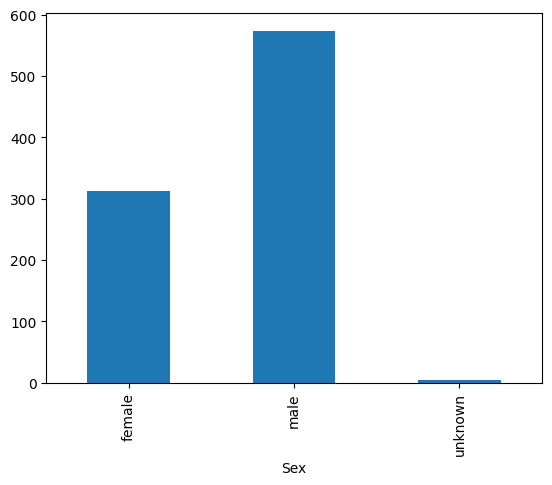

In [49]:
Data.groupby('Sex').count()['Survived'].plot.bar()
#(Data.groupby('Sex').count()['Survived']/len(Data)).plot.bar()

In [50]:
#sns.catplot(data=Data, x="Sex", y="Survived", kind="bar", height=4, aspect=.6)

# Two Factor Analysis

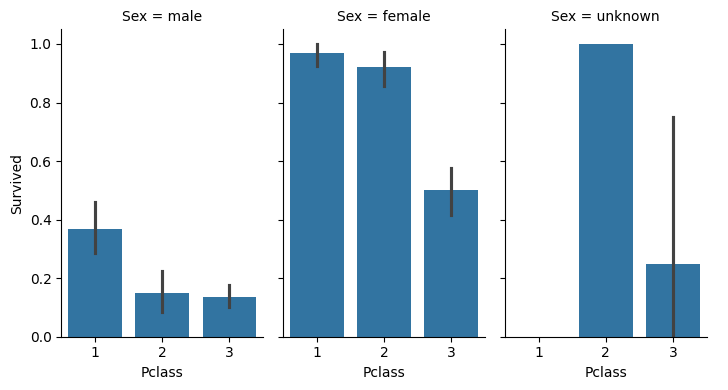

In [31]:
#sns.set_theme(style="whitegrid")
#sns.barplot(x="Sex", y="Survived", hue='Pclass',  data=Data)
#sns.barplot(x="Sex", y="Survived", hue='Sex',  estimator='sum', data=Data)
#sns.barplot(x="Sex", y="Survived", hue='Sex', estimator=lambda x: sum(x)/len(Data), data=Data)
sns.catplot(
    data=Data, x="Pclass", y="Survived", col="Sex",
    kind="bar", height=4, aspect=.6,
)

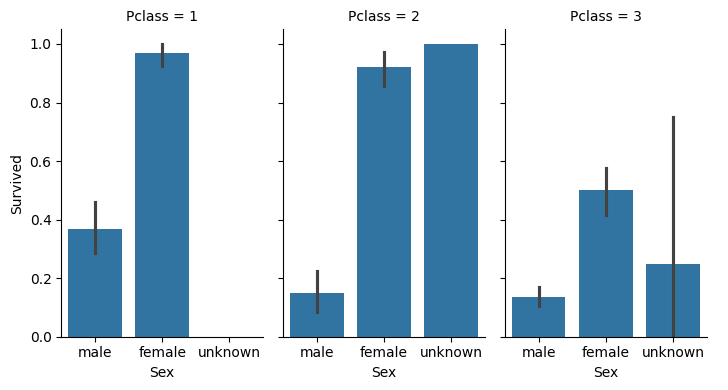

In [26]:
sns.catplot(
    data=Data, x="Sex", y="Survived", col="Pclass",
    kind="bar", height=4, aspect=.6,
)

**6.** Delete records with unknown sex

In [ ]:
Data.drop(index = Data[Data.Sex == 'unknown'].index, inplace=True)

**7.** Encode column Sex

In [ ]:
#Data['Sex'] = Data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
#Data['Sex'] = Data['Sex'].map({'male': 1, 'female': 0})
#Data.replace({'Sex': {'male': 1, 'female': 0}}, inplace = True)
#Data.head()

## Use OneHotEncoder

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
onee = OneHotEncoder(drop='first')

In [18]:
onee.fit(Data[['Sex']])
#Data.Sex = onee.fit_transform(Data[['Sex']]).toarray()

OneHotEncoder(drop='first')

In [21]:
onee.categories_

[array(['female', 'male'], dtype=object)]

In [22]:
Data.Sex = onee.fit_transform(Data[['Sex']]).toarray()

In [23]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,1.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0.0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,1.0,35.0,0,0,373450,8.0500,NaN,S


**8.** Explore next column 'Age'

In [ ]:
Data[Data['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,Moran; Mr. James,1.0,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,Williams; Mr. Charles Eugene,1.0,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,Masselmani; Mrs. Fatima,0.0,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,Emir; Mr. Farred Chehab,1.0,NaN,0,0,2631,7.2250,NaN,C
29,30,0,3,Todoroff; Mr. Lalio,1.0,NaN,0,0,349216,7.8958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,Razi; Mr. Raihed,1.0,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage; Miss. Dorothy Edith ""Dolly""",0.0,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,van Melkebeke; Mr. Philemon,1.0,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,Laleff; Mr. Kristo,1.0,NaN,0,0,349217,7.8958,NaN,S


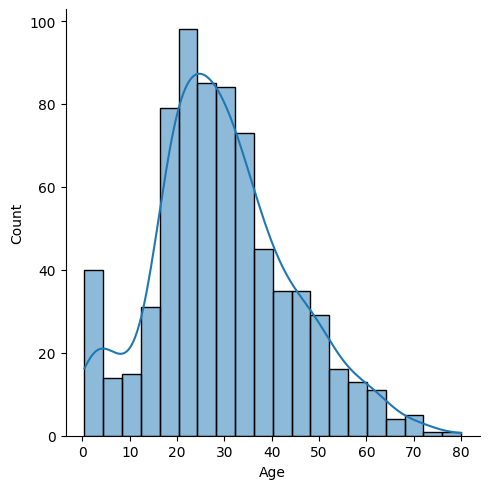

In [35]:
#Data['Age'].plot.hist()
sns.displot(Data.Age, kde=True) # kind='kde')

In [ ]:
median_age = Data['Age'].median()
mean_age = Data['Age'].mean()
print(f'Median = {median_age},\nMean = {mean_age}')

Median = 28.0,
Mean = 29.756095505617978


In [ ]:
#Data.loc[Data[Data['Age'].isna()].index, 'Age'] = mean_age
#Data['Age'].fillna(mean_age, inplace=True)
from sklearn.impute import SimpleImputer
imp = SimpleImputer()
Data['Age'] = imp.fit_transform(Data[['Age']])

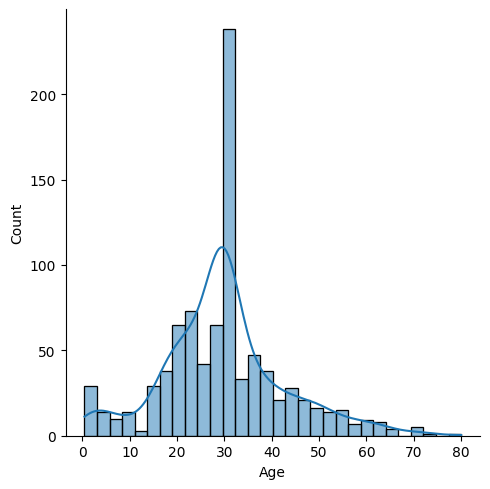

In [ ]:
sns.displot(Data.Age, kde=True)

<Axes: xlabel='Survived', ylabel='Age'>

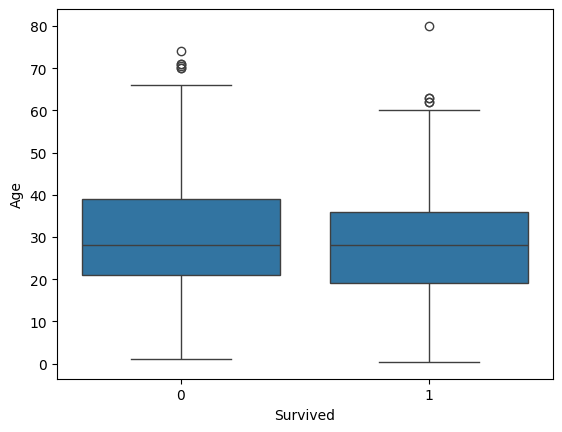

In [55]:
#One Factor
sns.boxplot(data=Data, x='Survived', y='Age')
#Two Factor
#sns.boxplot(data=Data, x='Pclass', y='Age', hue='Survived', palette='Set2')

**9.** Feature Embarked
#Problem 1. Analyze this feature: values, distribution, one-factor analysis, cleaning if needed

**10.** 'SibSp'
#Problem 2. Analyze this feature

**11.** 'Parch'
#Problem 3. Analyze this feature

**12** 'Cabin'
#Problem 4. Analyze this feature

# One-Hot Encoder VS Ordinal Encoder (Label Encoder)
[OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

[OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)

[LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [ ]:
#le = preprocessing.LabelEncoder()   #Use for y
from sklearn.preprocessing import OrdinalEncoder   #Use for X
#from sklearn.preprocessing import OneHotEncoder

In [ ]:
onee.fit_transform(Data[['Embarked']]).toarray()

array([[0., 1.],
       [0., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 0.],
       [1., 0.]])

In [ ]:
onee.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [ ]:
Data[onee.categories_[0][1:]] = onee.fit_transform(Data[['Embarked']]).toarray()

In [ ]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S
0,1,0,3,Braund; Mr. Owen Harris,1.0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0.0,38.0,1,0,PC 17599,71.2833,C85,C,0.0,0.0
2,3,1,3,Heikkinen; Miss. Laina,0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,1.0
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0.0,35.0,1,0,113803,53.1000,C123,S,0.0,1.0
4,5,0,3,Allen; Mr. William Henry,1.0,35.0,0,0,373450,8.0500,NaN,S,0.0,1.0


##Features and Target Isolation

In [ ]:
y = Data['Survived']
X = Data.drop(columns = ['Survived', 'PassengerId', 'Name', 'Ticket','Cabin', "Embarked"])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
149,2,1.0,42.000000,0,0,13.0000,0.0,1.0
238,2,1.0,19.000000,0,0,10.5000,0.0,1.0
224,1,1.0,38.000000,1,0,90.0000,0.0,1.0
365,3,1.0,30.000000,0,0,7.2500,0.0,1.0
384,3,1.0,29.756096,0,0,7.8958,0.0,1.0


## Model Selection


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = neigh.predict(X_test)

In [ ]:
sum(y_test == y_pred)/len(y_test)

0.7030716723549488